# Basic MLMC runs and plots

In [1]:
import numpy as np 


def non_hom_test(x, y):
    return np.sin(x)*np.sin(y)


def test_phi(x, y):
    return 10*np.sin(np.pi*x)*np.sin(np.pi*y)


def test_bound(x, y):
    return 0 #np.cos(np.pi*x)*np.cos(np.pi*y)


def test_rhs(x, y):
    return np.pi**2 * (np.sin(np.pi * x)*np.sin(np.pi * y))

def test_cos(x, y):
    return np.cos(np.pi*x)*np.cos(np.pi*y)

def test_cos_rhs(x, y):
    return (np.pi**2) * np.cos(np.pi*x)*np.cos(np.pi*y)


In [2]:
from walk_on_spheres import walk_on_spheres_with_work
from main import generate_samples
from analyze_data import calculate_mean_err, calculate_std

def check_walk_on_spheres(x, y, N, delta, f, g, N_runs=20):
    samples_work = generate_samples(x, y, int(N_runs*N), delta, f, g)
    samples = samples_work[:, 0]
    work = samples_work[:, 1].sum()/N_runs
    err = calculate_mean_err(N, samples, x, y, f)
    std = calculate_std(N, samples)
    return err, std, work

In [3]:
import matplotlib.pyplot as plt
from test_functions import sin, sin_rhs, sq_cos, sq_cos_rhs, gaussian, gaussian_rhs
N = 100000
x = y = .5
dt0s = [.1/(10**i) for i in range(0, 6)]
epsilon = .025
mean_errs = []
stds = []
works = []

for dt0 in dt0s:
    err, std, work = check_walk_on_spheres(x, y, N, dt0, gaussian, gaussian_rhs) 
    print("average error: ", err)  
    print("std or runs ", std)
    print("work per run ", work)
    mean_errs.append(err)
    stds.append(std)
    works.append(work)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [01:13<00:00, 27322.95it/s]


average error:  0.4340284486446625
std or runs  0.013073566054692282
work per run  133644.6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [01:44<00:00, 19091.11it/s]


average error:  4.944361855835444
std or runs  0.0242575499733273
work per run  444504.1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [03:14<00:00, 10266.26it/s]


average error:  6.332291000148986
std or runs  0.039900067598181335
work per run  776068.75


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [04:31<00:00, 7376.20it/s]


average error:  6.767907352612163
std or runs  0.027211691660543512
work per run  1106950.55


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [04:57<00:00, 6714.43it/s]


average error:  6.904054935108145
std or runs  0.02336232277041593
work per run  1439915.85


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [05:53<00:00, 5664.87it/s]


average error:  6.950981389321512
std or runs  0.031192037099244403
work per run  1771230.4


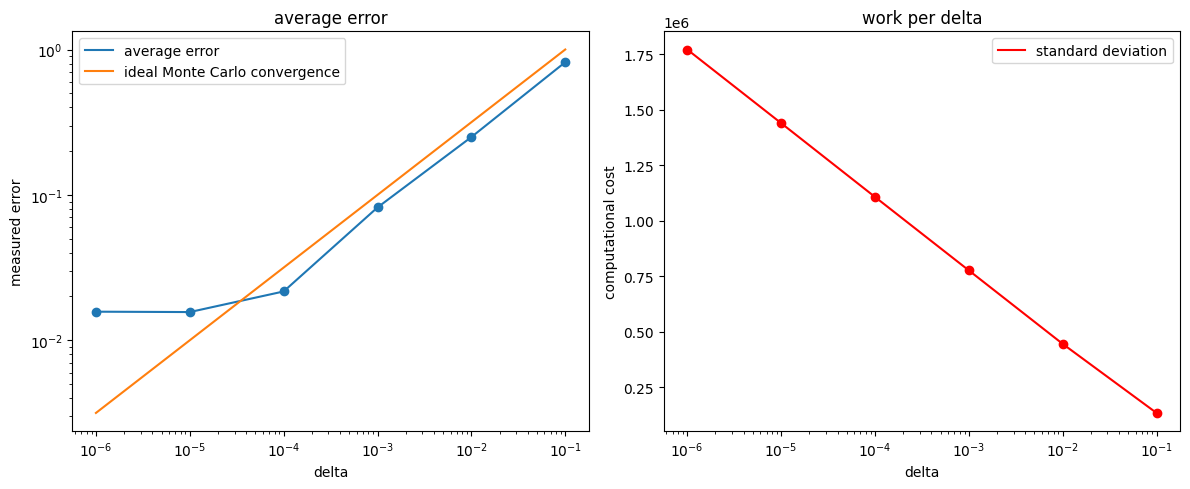

In [11]:

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


Monte_Carlo_ideal = np.logspace(0, 5, 6, base=(1/np.sqrt(10)))

# Log-Log plot
axes[0].loglog(dt0s, mean_errs, label="average error")
axes[0].scatter(dt0s, mean_errs)
axes[0].loglog(dt0s, Monte_Carlo_ideal, label="ideal Monte Carlo convergence")
axes[0].set_title("average error")
axes[0].set_xlabel("delta")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].semilogx(dt0s, works, label="standard deviation", color="r")
axes[1].scatter(dt0s, works, color="r")
axes[1].set_title("work per delta")
axes[1].set_xlabel("delta")
axes[1].set_ylabel("computational cost")

axes[1].legend()

plt.savefig("walk_on_spheres_delta_conv.png")

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:12<00:00, 16221.82it/s]


average error:  0.049046758904737045
std or runs  0.058610026966518694
work per run  176896.9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [02:20<00:00, 14238.56it/s]


average error:  0.013480260293075325
std or runs  0.016254219637287137
work per run  1772285.5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000000/20000000 [30:50<00:00, 10808.33it/s]


average error:  0.005022079497261939
std or runs  0.005499619147794527
work per run  17718452.2


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

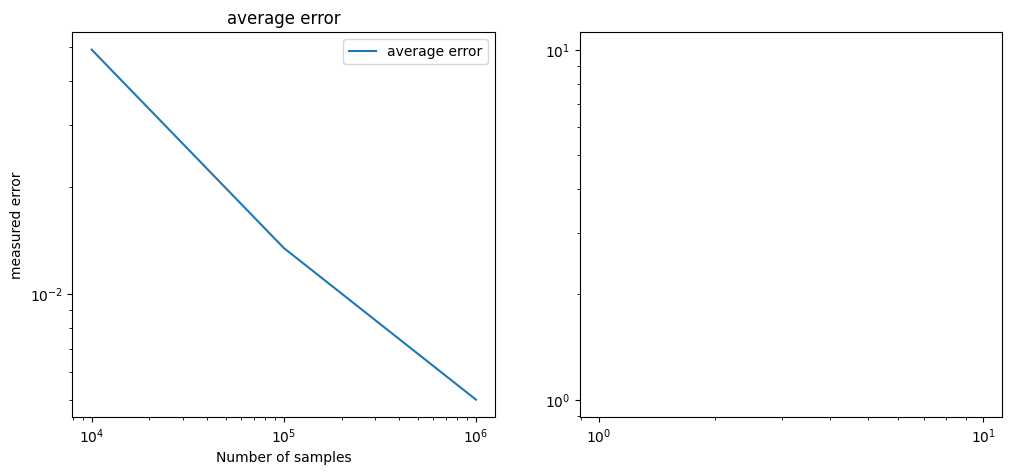

In [3]:
import matplotlib.pyplot as plt
from test_functions import sin, sin_rhs, sq_cos, sq_cos_rhs, gaussian, gaussian_rhs
Ns = [10000*(10**i) for i in range(3)]
x = y = .5
dt0 = 1e-6
epsilon = .025
mean_errs = []
stds = []
works = []

for N in Ns:
    err, std, work = check_walk_on_spheres(x, y, N, dt0, gaussian, gaussian_rhs) 
    print("average error: ", err)  
    print("std or runs ", std)
    print("work per run ", work)
    mean_errs.append(err)
    stds.append(std)
    works.append(work)

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(Ns, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("Number of samples")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].loglog(Ns, std, label="standard deviation", color="r")
axes[1].set_title("std per N")
axes[1].set_xlabel("Number of samples")
axes[1].set_ylabel("standard deviation")

axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

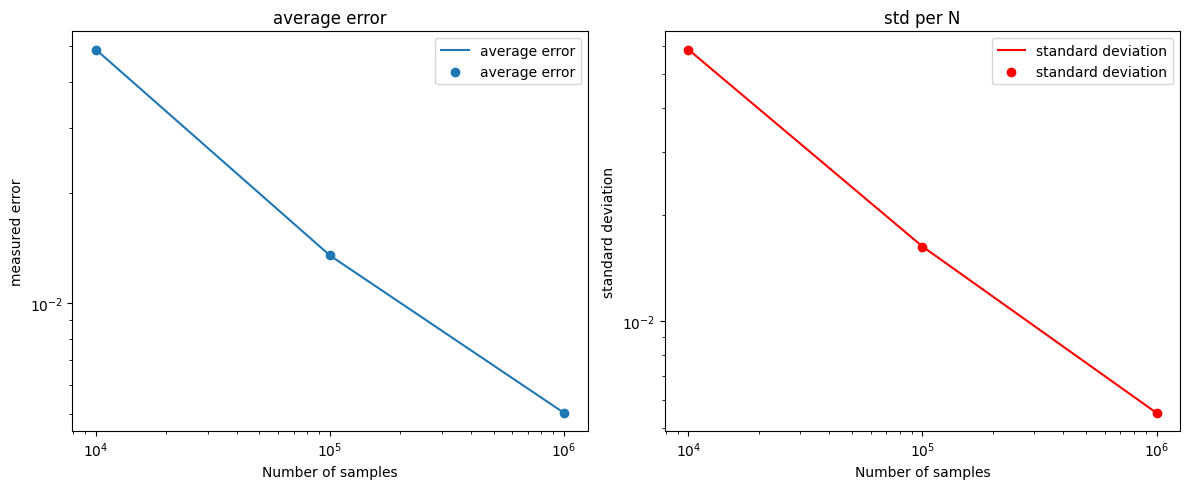

<Figure size 640x480 with 0 Axes>

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(Ns, mean_errs, label="average error")
axes[0].scatter(Ns, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("Number of samples")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].loglog(Ns, stds, label="standard deviation", color="r")
axes[1].scatter(Ns, stds, label="standard deviation", color="r")
axes[1].set_title("std per N")
axes[1].set_xlabel("Number of samples")
axes[1].set_ylabel("standard deviation")

axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()
plt.savefig("conv_study_N.png")

In [4]:
from mlmc import mlmc
from tqdm.notebook import tqdm


def check_mlmc(N, epsilon, dt0, x=.5, y=.5):
    errs = np.zeros(N)
    expectation = np.zeros(N)
    cost = np.zeros(N)
    max_level = np.zeros(N)
    for i in tqdm(range(N)):
        expectation[i], cost[i], max_level[i], _ = mlmc(x, y, 
                                                     test_cos, test_cos_rhs, 
                                                     dt0, epsilon)
        errs[i] =  abs(test_cos(x, y) - expectation[i])
        
    return errs, cost, max_level

  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.03593900039741751
maximal error:  0.12595157658375444
minimal error:  0.0013054935862111634
std of error:  0.026342487018793992


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.032766552803979346
maximal error:  0.07658372708915871
minimal error:  0.0003241714015175248
std of error:  0.02236568547335027


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.020151927622856648
maximal error:  0.06263441244691863
minimal error:  0.00041006491013646524
std of error:  0.01618960856659715


  0%|          | 0/50 [00:00<?, ?it/s]

average error:  0.010898601350251341
maximal error:  0.03810781212514073
minimal error:  0.000327177297000134
std of error:  0.009110497707871612


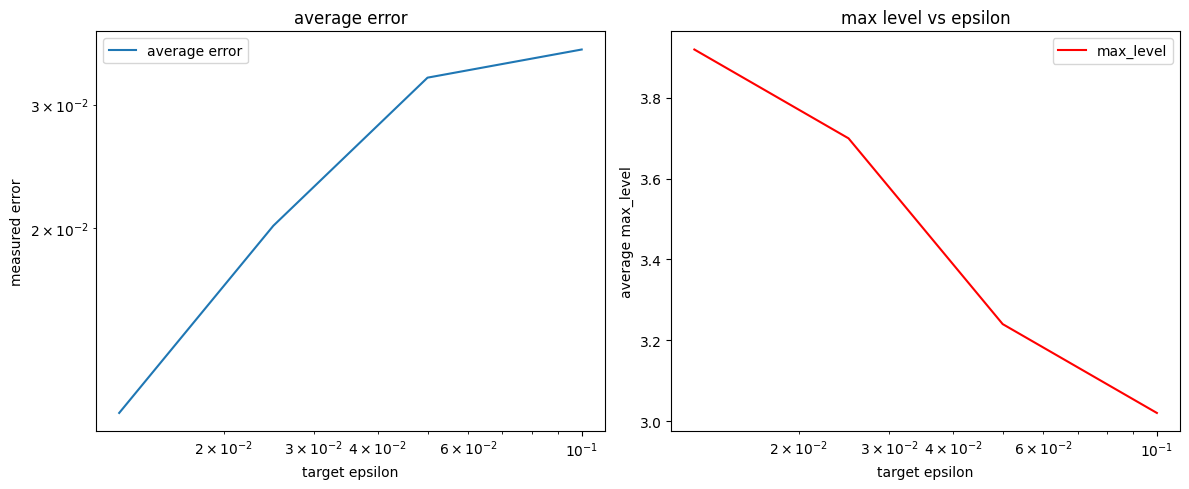

In [3]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0 = .01
epsilons = [.1, .05, .025, .0125]
mean_errs = []
mean_levels = []
mean_costs = []

for eps in epsilons:
    errs, costs, levels = check_mlmc(N, eps, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

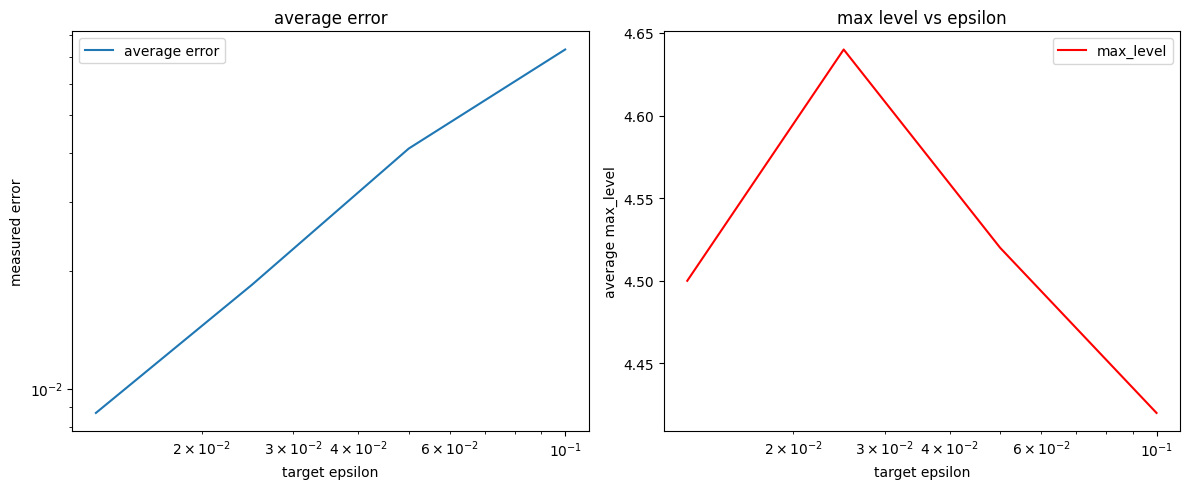

In [4]:
# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(epsilons, mean_errs, label="average error")
axes[0].set_title("average error")
axes[0].set_xlabel("target epsilon")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(epsilons, mean_levels, label="max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("target epsilon")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log")
axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

In [6]:
import matplotlib.pyplot as plt
N = 50
x = y = .5
dt0s = [.1/(2**i) for i in range(3, 9)]
epsilon = .025
mean_errs = []
mean_levels = []
mean_costs = []

for dt0 in dt0s:
    errs, costs, levels = check_mlmc(N, epsilon, dt0)
    print("average error: ", errs.mean())
    print("maximal error: ", errs.max())
    print("minimal error: ", errs.min())    
    print("std of error: ", errs.std())
    mean_errs.append(errs.mean())
    mean_levels.append(levels.mean())

# Create subplots with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Log plot
axes[0].loglog(dt0s, mean_errs, label="average error", base=2)
axes[0].set_title("average error")
axes[0].set_xlabel("dt at 0th level")
axes[0].set_ylabel("measured error")
axes[0].legend()

# Linear plot
axes[1].plot(dt0s, mean_levels, label="average max_level", color="r")
axes[1].set_title("max level vs epsilon")
axes[1].set_xlabel("dt at 0th level")
axes[1].set_ylabel("average max_level")
axes[1].set_xscale("log", base=2)

axes[1].legend()

# Show plots
plt.tight_layout()  # Adjust spacing
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
# benchmark how long it takes to generate a single sample
from random_walk import feynman_kac_correlated
x = .5
y = .5
dt_fine = .000001
level = 1

%timeit feynman_kac_correlated((x, y, test_bound, test_rhs, dt_fine, level))

7.84 ms ± 358 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
y = np.log2(np.abs(np.array([-6.05463385e-02, -3.70904309e-02, -2.06358718e-02, 
                    -2.25945456e-02, -1.50705625e-02, -9.64745850e-04])))
x = np.linspace(1, 6, 6)

a, b = np.polyfit(x, y, 1)
a2, b2, = np.polyfit(x[:-1], y[:-1], 1)

<function matplotlib.pyplot.show(close=None, block=None)>

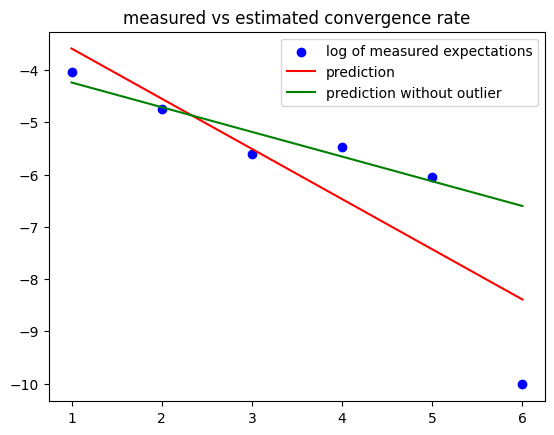

In [7]:
plt.scatter(x, y, label="log of measured expectations", color="b")
plt.plot(x, a*x + b, label="prediction", color="r")
plt.plot(x, a2*x + b2, label="prediction without outlier", color="g")
plt.title("measured vs estimated convergence rate")
plt.legend()
plt.show

## Plot distribution of feynman_kac_correlated

In [6]:
from walk_on_spheres import walk_on_spheres
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from test_functions import gaussian, gaussian_rhs

N_samples = 10000
dt = .001
level = 1
dt_ratio = 2
x = .5
y = .5
args = (x, y, test_bound, test_rhs, dt, level, dt_ratio)

integrals = np.zeros(N_samples)
work = np.zeros(N_samples)
for i in tqdm(range(N_samples)):
    integrals[i], work[i]= walk_on_spheres(x, y, gaussian, gaussian_rhs, 1e-6)

  0%|          | 0/10000 [00:00<?, ?it/s]

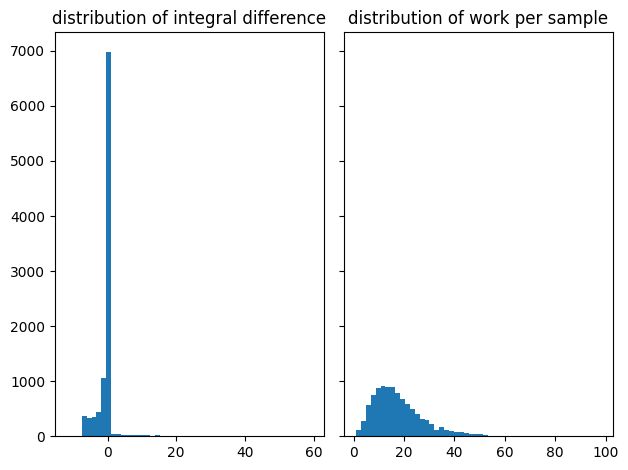

In [8]:
n_bins=50
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(integrals, bins=n_bins)
#axs[0].set_xlim(-4, -.01)
#axs[0].set_ylim(0, 200)
axs[0].set_title("distribution of integral difference")

axs[1].hist(work, bins=n_bins)
axs[1].set_title("distribution of work per sample")

plt.show()

In [5]:
%%timeit
mlmc(.5, .5, test_bound, test_rhs, .01, .01)

The slowest run took 7.56 times longer than the fastest. This could mean that an intermediate result is being cached.
46.8 s ± 27.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
mlmc(.7, .7, test_bound, test_rhs, .01, .01)

23.1 s ± 7.79 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
mlmc(.5, .5, test_cos, test_cos, .01, .01)

2.12 s ± 995 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [1]:
from walk_on_spheres import sample_radius_transform, sample_radius_reject


In [2]:
%%timeit
sample_radius_reject(0.5)

5.86 μs ± 1.11 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [4]:
%%timeit
sample_radius_transform(.5)

67.1 μs ± 9.87 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
import pandas as pd

benchmark_projection_results = pd.read_csv("projection_data.csv")
benchmark_precise_exit_results = pd.read_csv("precise_exit_data.csv")
print(benchmark_precise_exit_results)
print(benchmark_projection_results)

   Unnamed: 0    x    y                                      f  \
0           0  0.5  0.5    <function sq_cos at 0x2afdbebf50d0>   
1           1  0.5  0.5       <function sin at 0x2afdbebf5ae8>   
2           2  0.5  0.5       <function cos at 0x2afdbebf5488>   
3           3  0.5  0.5  <function gaussian at 0x2afe375239d8>   
4           4  0.5  0.5       <function exp at 0x2afe37523bf8>   
5           5  0.5  0.5      <function poly at 0x2afe375238c8>   

                                           g   dt0  epsilon  \
0    <function sq_cos_rhs at 0x2afdbebf51e0>  0.01     0.01   
1       <function sin_rhs at 0x2afdbebf5620>  0.01     0.01   
2       <function cos_rhs at 0x2afdbebf5f28>  0.01     0.01   
3  <function gaussian_rhs at 0x2afe37523a60>  0.01     0.01   
4       <function exp_rhs at 0x2afe37523c80>  0.01     0.01   
5      <function poly_rhs at 0x2afe37523950>  0.01     0.01   

   avg_execution_time  avg_computational_cost  avg_max_level  expectation  \
0           51.189

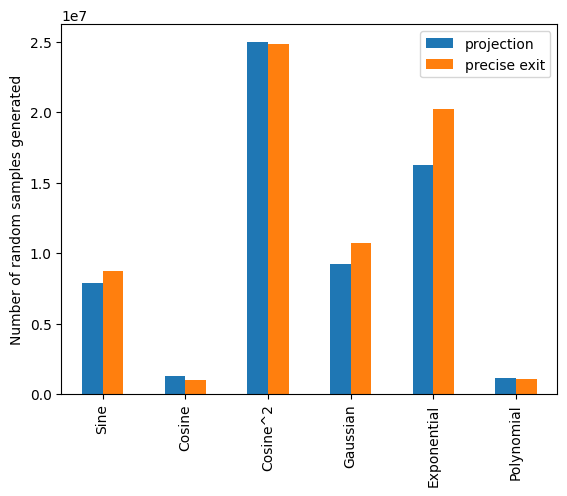

In [17]:
from test_functions import sin, cos, sq_cos, poly, gaussian, exp
import matplotlib.pyplot as plt
import numpy as np

projection_function_results = benchmark_projection_results
#projection_function_results = benchmark_projection_results[benchmark_projection_results['x'] == 0.5]
#projection_function_results = projection_function_results[projection_function_results['dt0'] == 0.01]
#print(projection_function_results)
#projection_function_results = projection_function_results[projection_function_results['epsilon'] == 0.01]

precise_exit_function_results = benchmark_precise_exit_results
#precise_exit_function_results = benchmark_precise_exit_results[benchmark_precise_exit_results['x'] == 0.5]
#precise_exit_function_results = precise_exit_function_results[precise_exit_function_results['dt0'] == 0.01]
#precise_exit_function_results = precise_exit_function_results[precise_exit_function_results['epsilon'] == 0.01]
test_functions = {"Sine": sin,
                  "Cosine": cos,
                  "Cosine^2": sq_cos,
                  "Gaussian": gaussian,
                  "Exponential": exp,
                  "Polynomial": poly}

#projection_workload = [projection_function_results[projection_function_results['f'] == func]['avg_computational_cost'].values[0] for func in test_functions.values()]
projection_workload = [7912876.00, 1300192.75, 24982924.00, 9238783.85, 16223618.80, 1169221.05]
#print(projection_workload)

#precise_workload = [precise_exit_function_results[precise_exit_function_results['f'] == func]['avg_computational_cost'].values[0] for func in test_functions.values()]
precise_workload = [8724123.25, 1008691.90, 24877819.65, 10712459.65, 20222193.55, 1094093.45]
df = pd.DataFrame({"projection": projection_workload, "precise exit": precise_workload}, index=test_functions.keys())
df.plot.bar()
plt.ylabel("Number of random samples generated")
plt.savefig("projection_vs_precise_exit.png")
# Create boxplot of execution precise_workload
# boxplot2 = plt.bar(
    # list(test_functions.keys()),
    # precise_workload
# )

# plt.title('Workload Comparison (N rng samples) for Different Test Functions with epsilon=.01')
# plt.ylabel('Execution Time (seconds)')
# plt.grid(axis='y', linestyle='--', alpha=0.7)